In [1]:
# %load eeg_resampling.py
#%%
%matplotlib inline
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import scipy

import scikits.samplerate as sk_samplerate

import eeghdf
import eegvis.stacklineplot as stackplot
#%%

In [2]:
# check versions
print('scikits.samplerate (Secret Rabbit code) version:', sk_samplerate.__version__)
print('scipy:', scipy.__version__)
print('matplotlib.__version__')
#%%
plt.rcParams['figure.figsize'] = (24,9)

#%%

scikits.samplerate (Secret Rabbit code) version: 0.3.4.dev
scipy: 0.19.0
matplotlib.__version__


In [3]:
hf = eeghdf.Eeghdf('../../eeg-hdfstorage/data/absence_epilepsy.eeghdf')
print('original shape:', hf.phys_signals.shape)

eegsig = hf.phys_signals[0:30, 0:100000]
eegsigt = eegsig.transpose()
#%%

fs0 = hf.sample_frequency # usually 200
fs1 = 156
fs2 = 100
fs3 = 50

A = 0
B = 3

original shape: (36, 362200)


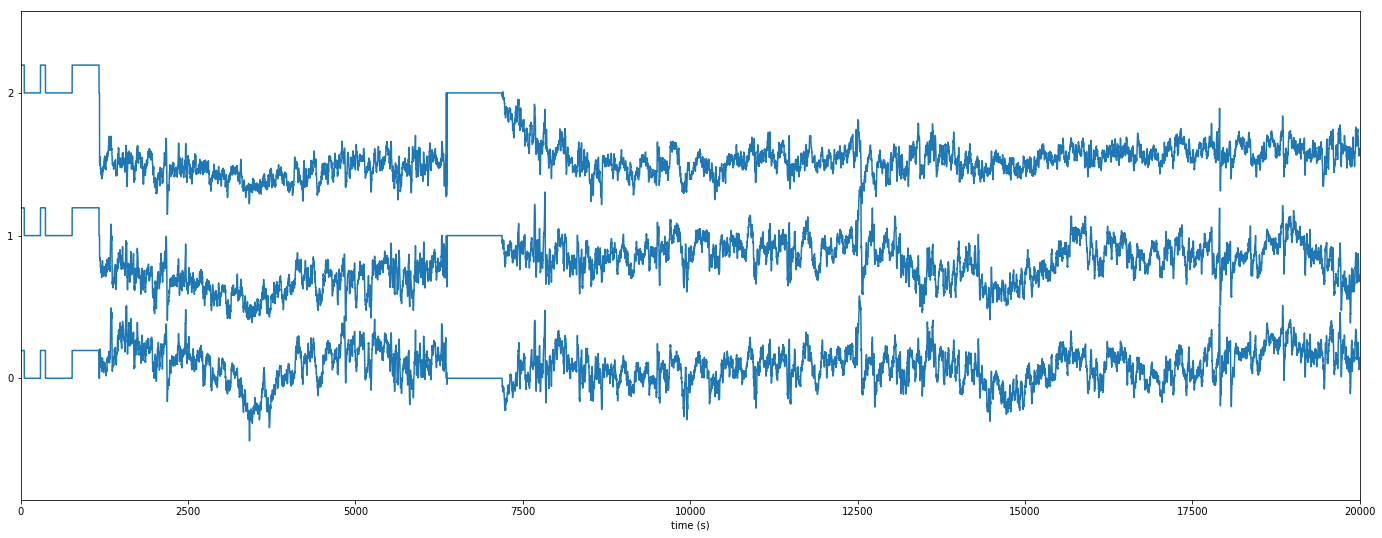

In [4]:
#%%
stackplot.stackplot_t(eegsigt[0:int(20000),A:B])

In [5]:
#%% Cell[] 
eegdownt1 = sk_samplerate.resample(eegsigt, fs1/fs0, 'sinc_best', verbose=True)
eegdownt2 = sk_samplerate.resample(eegsigt, fs2/fs0, 'sinc_best', verbose=True)

print('eegdownt1.shape:', eegdownt1.shape)

eegdownt1.shape: (77998, 30)


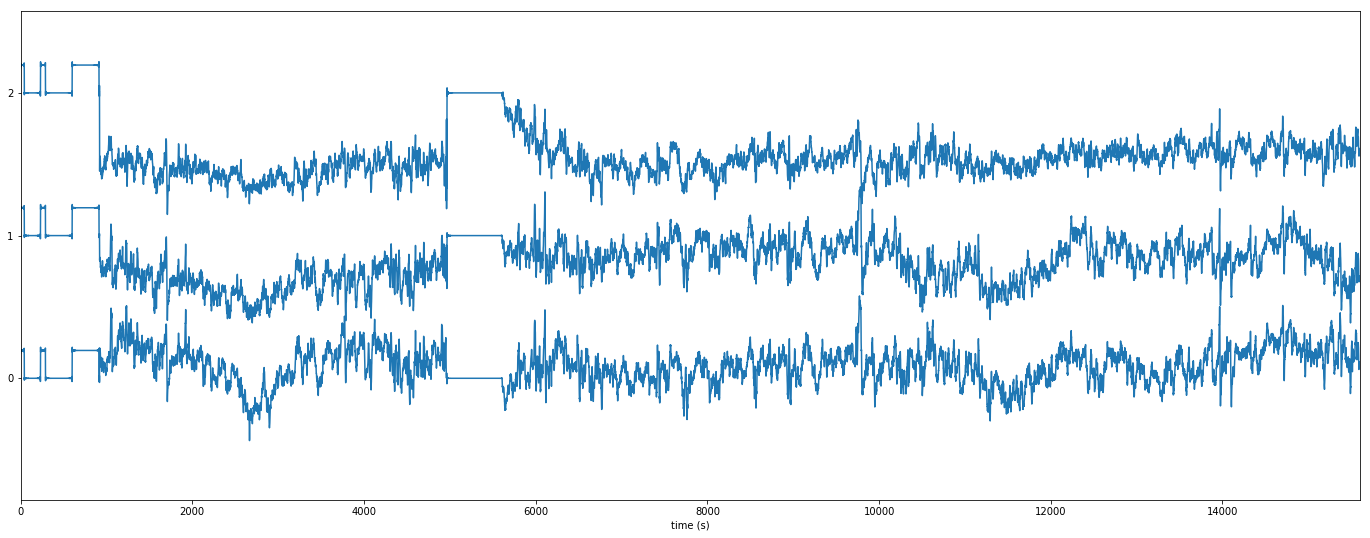

In [6]:
#%%
stackplot.stackplot_t(eegdownt1[0:int(20000*(fs1/fs0)),A:B])
#%%

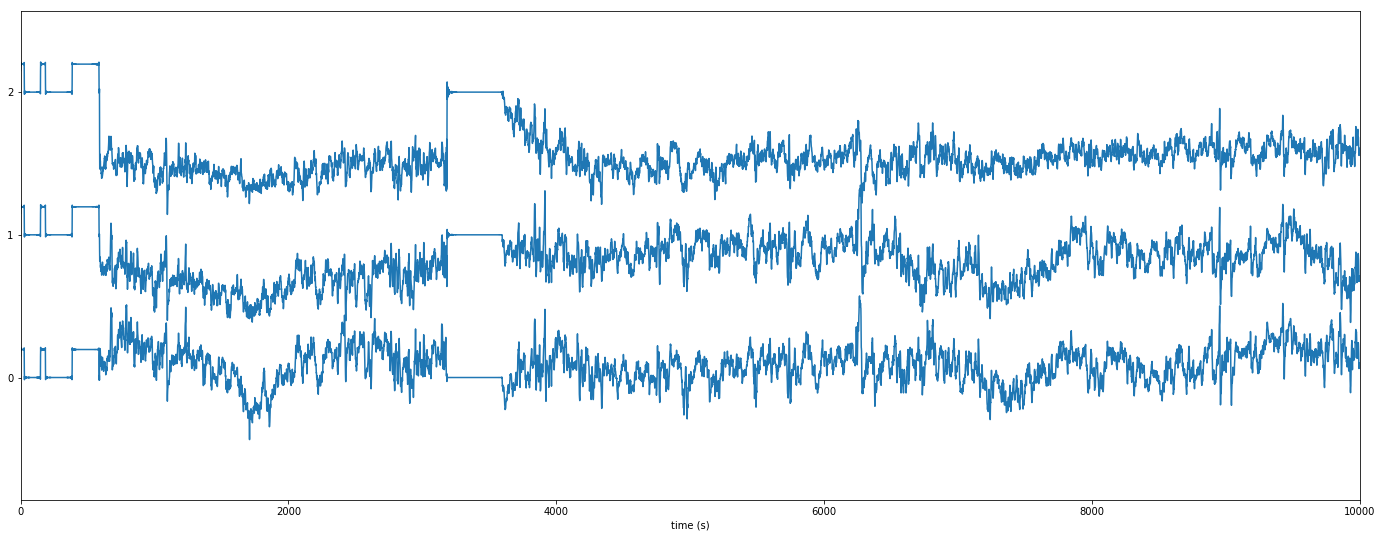

In [7]:
stackplot.stackplot_t(eegdownt2[0:int(20000*(fs2/fs0)),A:B])

ratio: 0.25


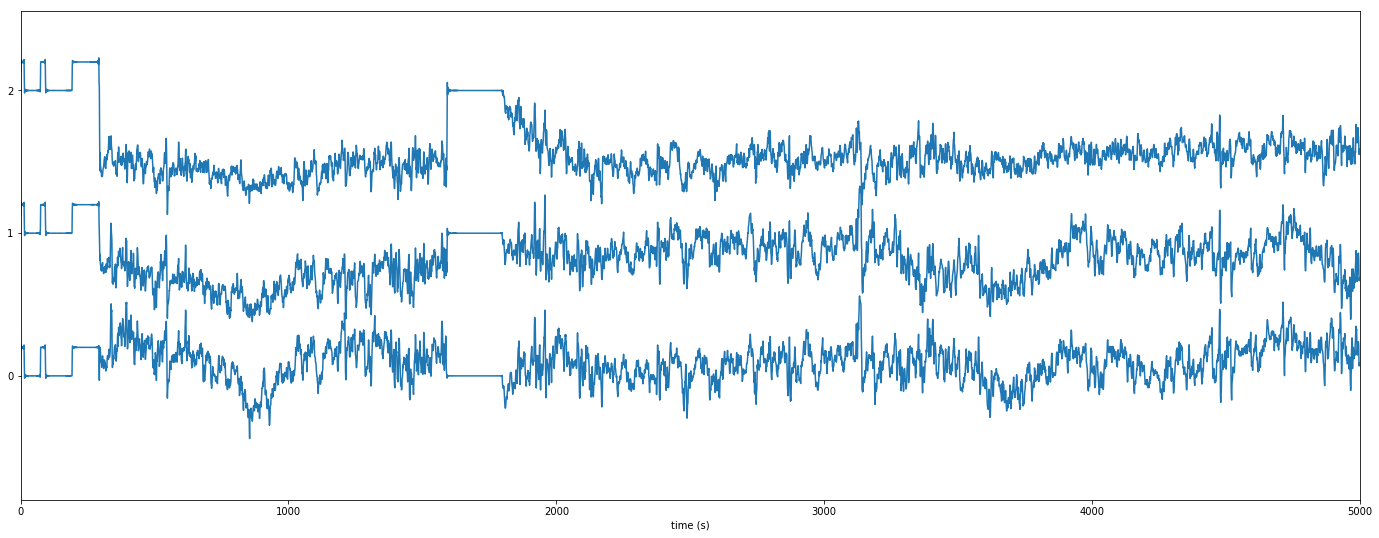

In [8]:
#%%
eegdownt3 = sk_samplerate.resample(eegsigt, fs3/fs0, 'sinc_best')
stackplot.stackplot_t(eegdownt3[0:int(20000*(fs3/fs0)),A:B])
print('ratio:', fs3/fs0)

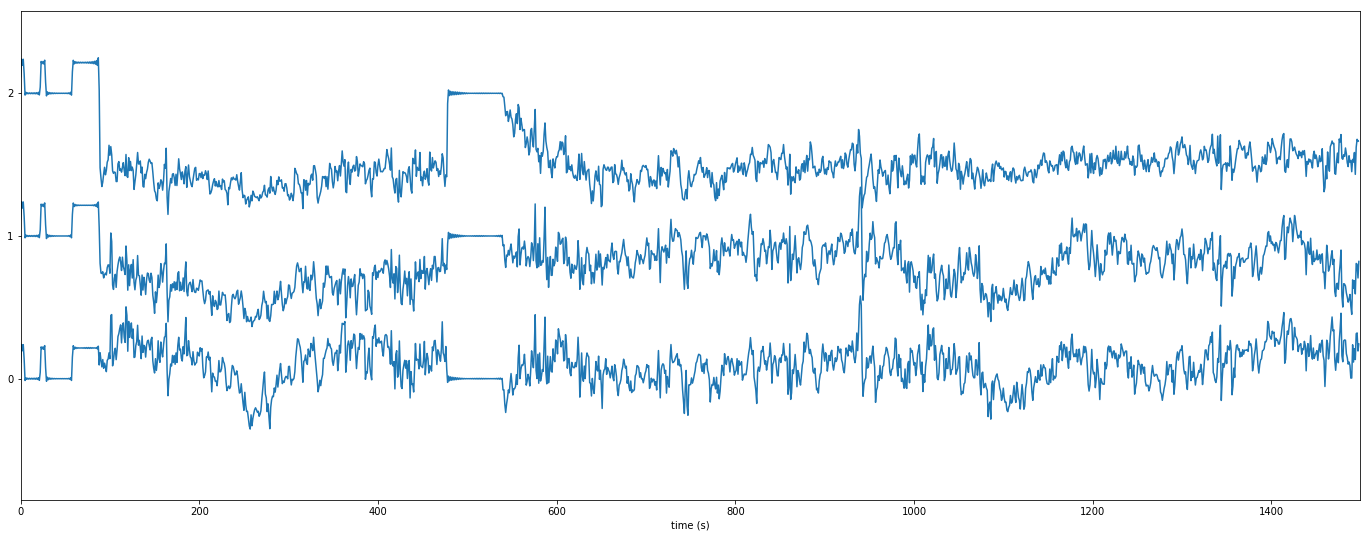

In [9]:
#%%
fs4 = 15
eegdownt4 = sk_samplerate.resample(eegsigt, fs4/fs0, 'sinc_best')
stackplot.stackplot_t(eegdownt4[0:int(20000*(fs4/fs0)),A:B])
#%%

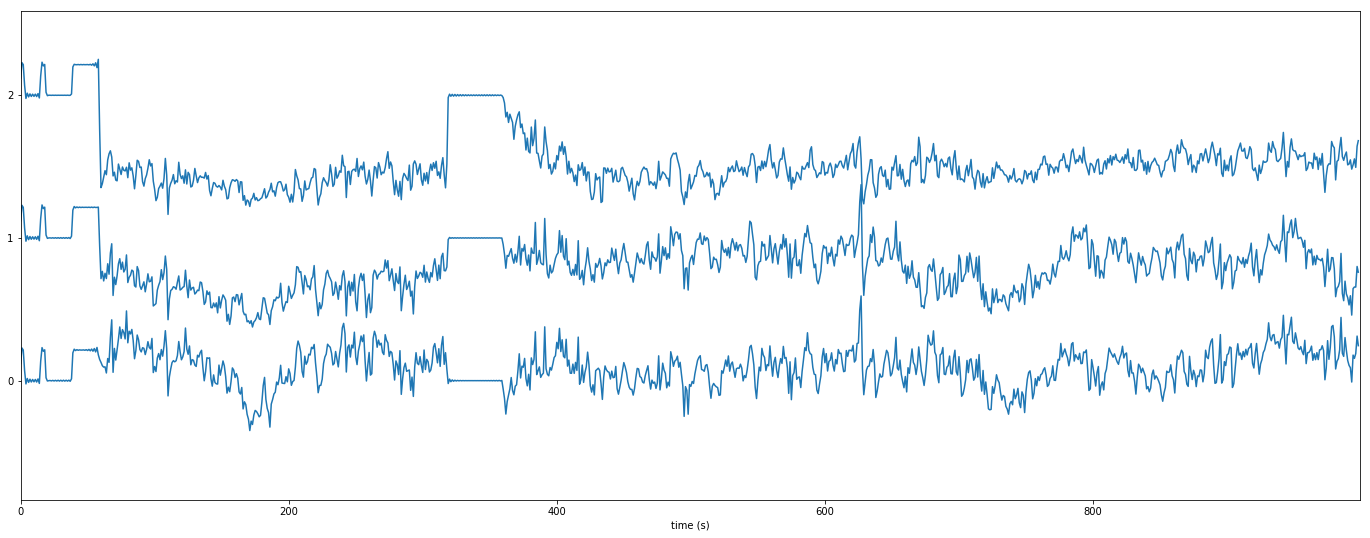

In [10]:
fs5 = 10
eegdownt5 = sk_samplerate.resample(eegsigt, fs5/fs0, 'sinc_best')
stackplot.stackplot_t(eegdownt5[0:int(20000*(fs5/fs0)),A:B])
#%%

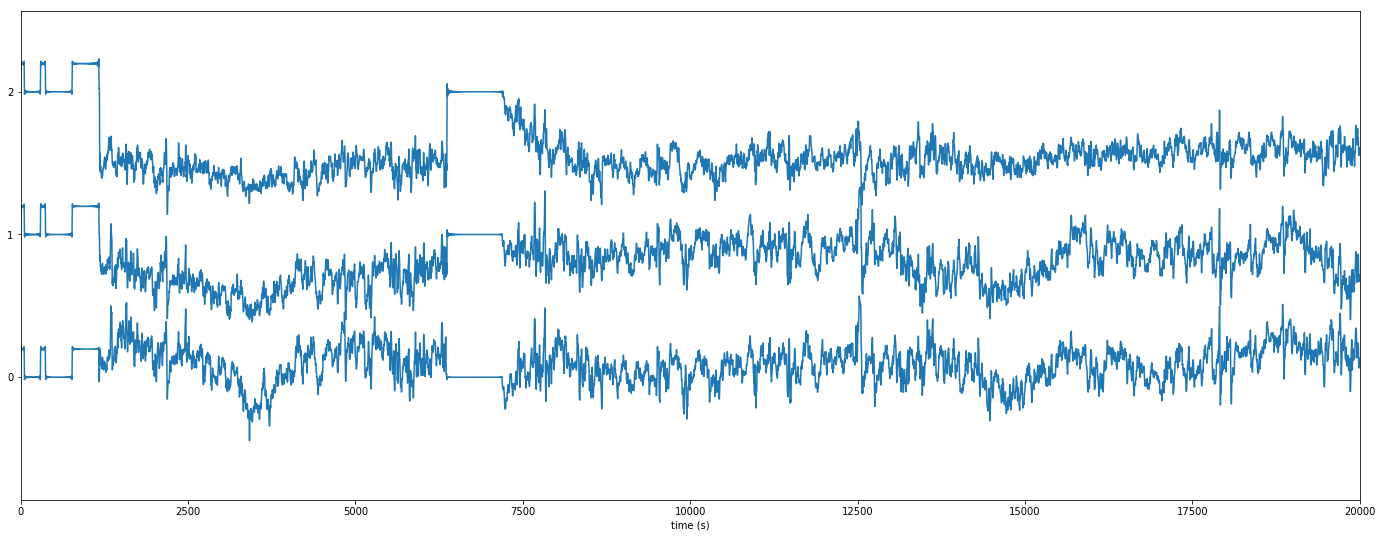

In [11]:
eegupt3 = sk_samplerate.resample(eegdownt3, fs0/fs3, 'sinc_best')

stackplot.stackplot_t(eegupt3[0:20000,A:B])

In [12]:
print('ratio:', fs0/fs3, 'down/upsample shape:', eegupt3.shape, 'original shape:', eegsigt.shape)

ratio: 4.0 down/upsample shape: (99991, 30) original shape: (100000, 30)


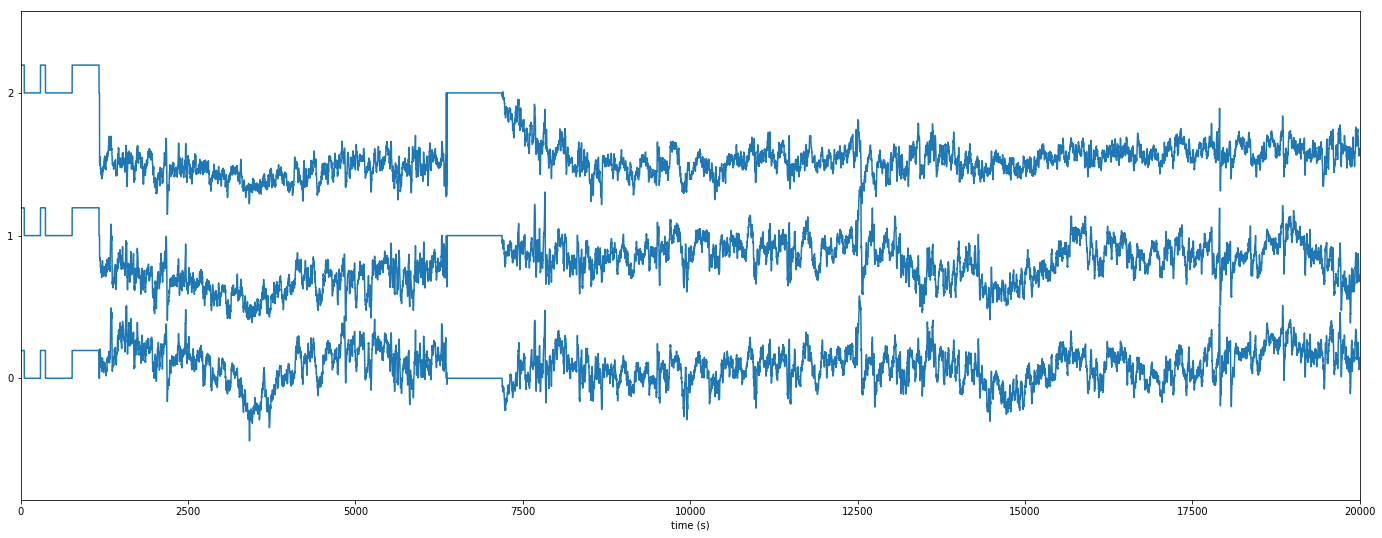

In [13]:
stackplot.stackplot_t(eegsigt[0:20000,A:B])

In [14]:
sum(eegsigt[0:20000,0])

436407.20312229719

In [15]:
sum(eegupt3[0:20000,0])

436386.101720898

In [16]:
sum(np.abs(eegupt3[0:20000,0])) - sum(np.abs(eegsigt[0:20000,0]))

-419.50621798972134

In [17]:
dd = eegsigt[0:20000,0] - eegupt3[0:20000,0]

In [18]:
V = np.var(eegsigt[0:20000,0])


In [19]:

print('Variance:', V, 'Stderr:', math.sqrt(V))

Variance: 1004.08221101 Stderr: 31.687256287248058


Text(0.5,1,'error relative to stderr of original signal')

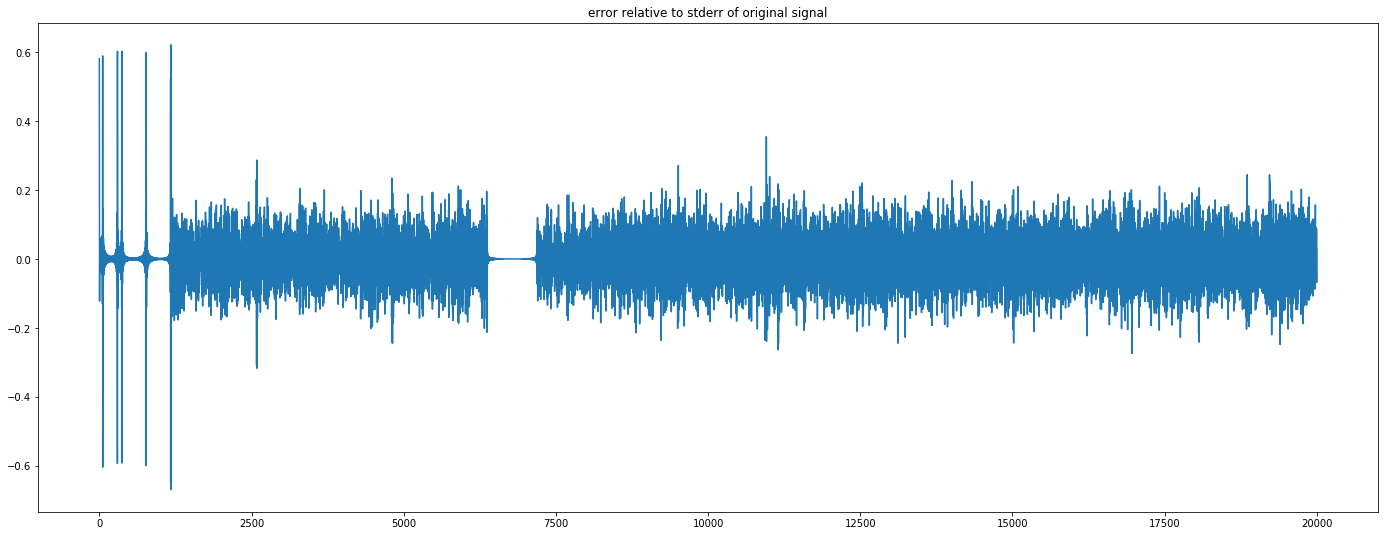

In [20]:
plt.plot(dd/math.sqrt(V))
plt.title('error relative to stderr of original signal')

Text(0.5,1,'compare original and subsampled/upsampled signal')

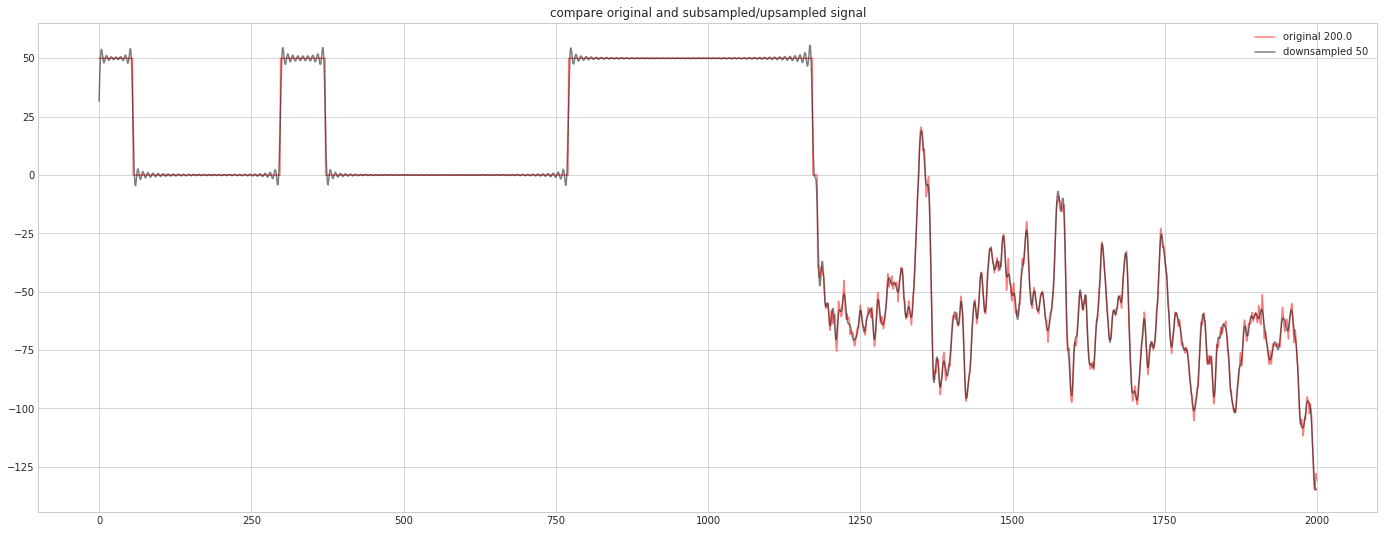

In [21]:
import seaborn
seaborn.set_style('whitegrid')
ch =1
t1,t2 = 0,2000
plt.plot(eegsigt[t1:t2,ch], color='red', alpha=0.5, label='original %s' % fs0)
plt.plot(eegupt3[t1:t2,ch] , color='black', alpha=0.5, label='downsampled %s' % fs3)
plt.legend()
plt.title('compare original and subsampled/upsampled signal')

Text(0.5,1,'compare original and subsampled/upsampled signal')

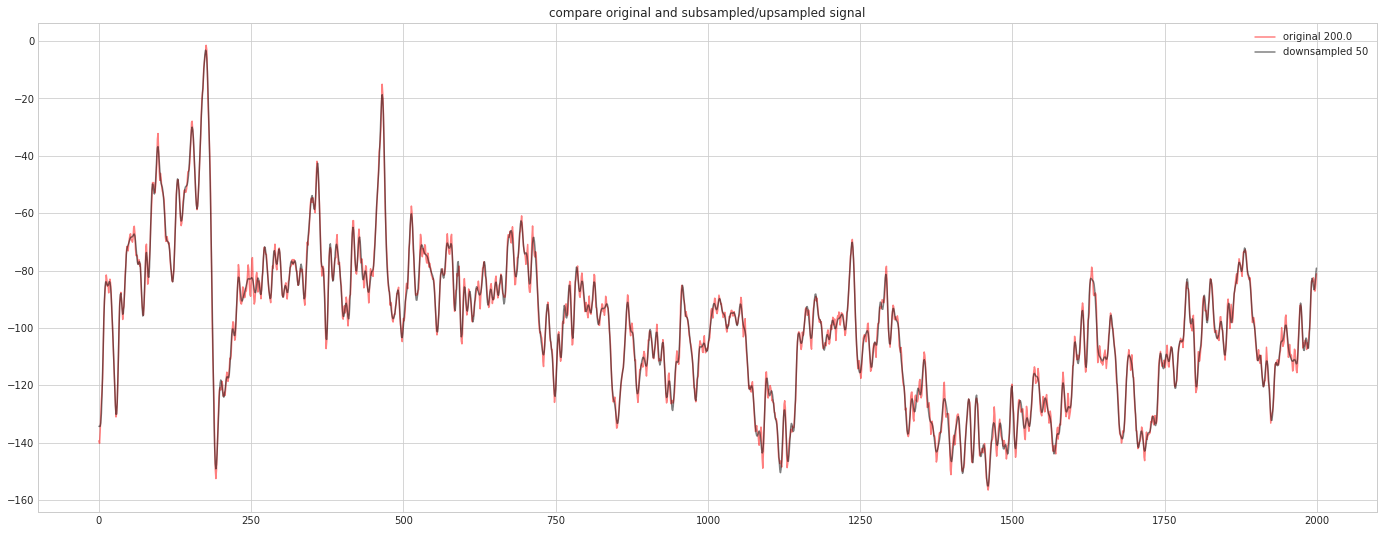

In [22]:
t1,t2 = 2000, 4000
plt.plot(eegsigt[t1:t2,ch], color='red', alpha=0.5, label='original %s' % fs0)
plt.plot(eegupt3[t1:t2,ch] , color='black', alpha=0.5, label='downsampled %s' % fs3)
plt.legend()
plt.title('compare original and subsampled/upsampled signal')

In [23]:
# now let's see how it looks with edf files
import edflib
import os.path

In [24]:
TUH_SZ_ROOT = '/mnt/data1/eegdbs/TUH/temple/tuh-sz-v1.2.0/v1.2.0'
tuhedf_fn = os.path.join(TUH_SZ_ROOT, 'eval/01_tcp_ar/00006059/s003_2012_05_25/00006059_s003_t000.edf')


In [25]:
print(tuhedf_fn)
ef = edflib.EdfReader(tuhedf_fn)

/mnt/data1/eegdbs/TUH/temple/tuh-sz-v1.2.0/v1.2.0/eval/01_tcp_ar/00006059/s003_2012_05_25/00006059_s003_t000.edf


In [26]:
N=27
[ ef.samplefrequency(ch) for ch in range(N)]

[250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0]

In [27]:
ef.get_signal_text_labels()

['EEG FP1-REF',
 'EEG FP2-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EEG A1-REF',
 'EEG A2-REF',
 'EEG FZ-REF',
 'EEG CZ-REF',
 'EEG PZ-REF',
 'EEG ROC-REF',
 'EEG LOC-REF',
 'EEG EKG1-REF',
 'EEG T1-REF',
 'EEG T2-REF',
 'PHOTIC-REF',
 'IBI',
 'BURSTS',
 'SUPPR']

In [28]:
ef.get_samples_per_signal()

array([301000, 301000, 301000, 301000, 301000, 301000, 301000, 301000,
       301000, 301000, 301000, 301000, 301000, 301000, 301000, 301000,
       301000, 301000, 301000, 301000, 301000, 301000, 301000, 301000,
       301000, 301000, 301000,   1204,   1204,   1204])

In [29]:
num_samples= ef.get_samples_per_signal()[0] # same for 0:27
num_samples

301000

In [30]:
edf_orig = np.zeros((27,num_samples),dtype='float32')

In [31]:
ef.get_signal(0)
#for ch in range(N):
#   edf_orig[ch,:] = ef.get_signal(ch)

array([ -7.77847633e+00,  -1.06461440e+00,   5.80183531e+00, ...,
         3.50000000e-03,   3.50000000e-03,   3.50000000e-03])

In [32]:
edf_orig[0,:] = _

In [33]:
for ch in range(1,26):
   edf_orig[ch,:] = ef.get_signal(ch)

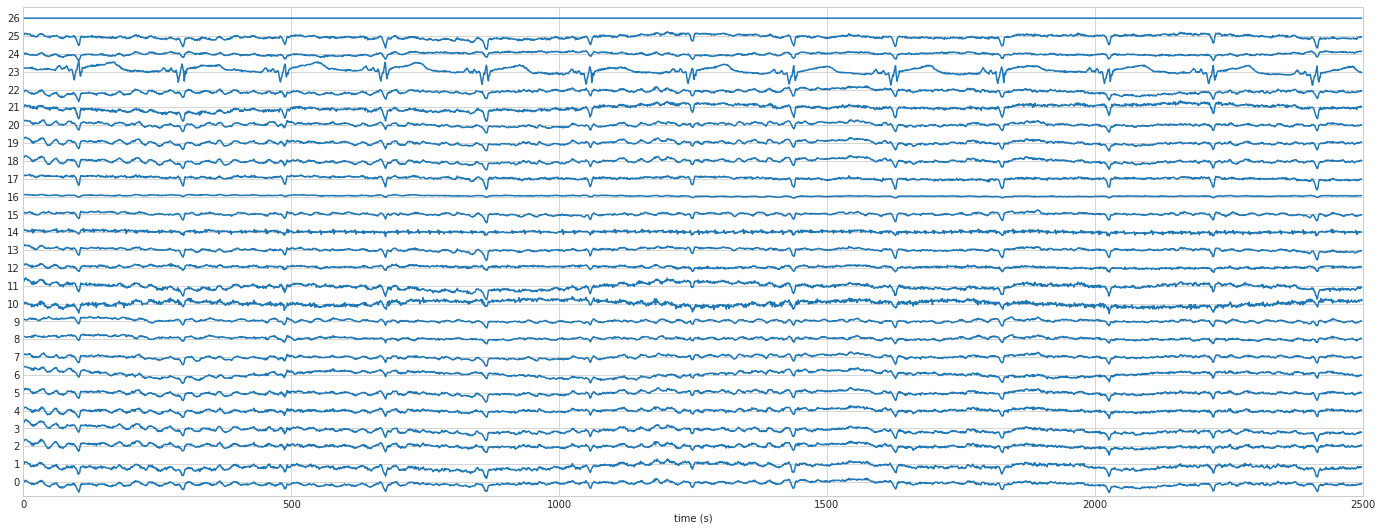

In [34]:
stackplot.stackplot(edf_orig[:,0:2500])

In [35]:
edf_origt = edf_orig.transpose()
print('edf_origt.shape', edf_origt.shape)

edf_origt.shape (301000, 27)


In [36]:

%time edf_down200t = sk_samplerate.resample(edf_origt, 200/ef.samplefrequency(0), 'sinc_best')

CPU times: user 2.86 s, sys: 28.2 ms, total: 2.89 s
Wall time: 2.88 s


In [37]:
edf_down200t.shape

(240799, 27)

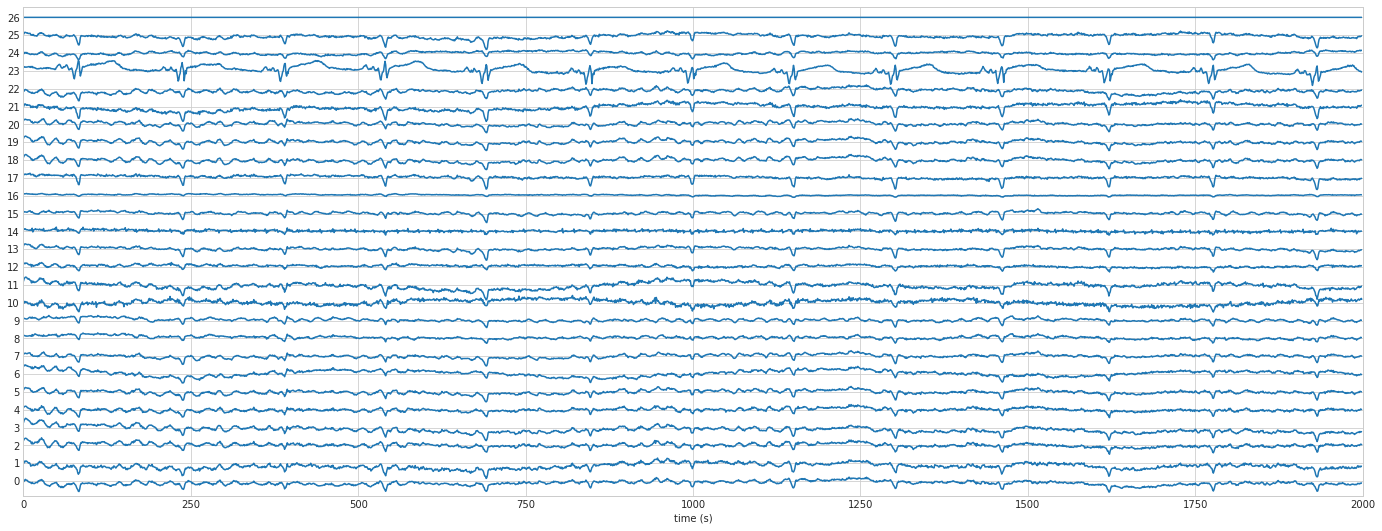

In [38]:
stackplot.stackplot_t(edf_down200t[0:2000,:])

In [39]:
edf_downupt = sk_samplerate.resample(edf_down200t, 250/200,'sinc_best')

In [40]:
edf_downupt.shape

(300997, 27)

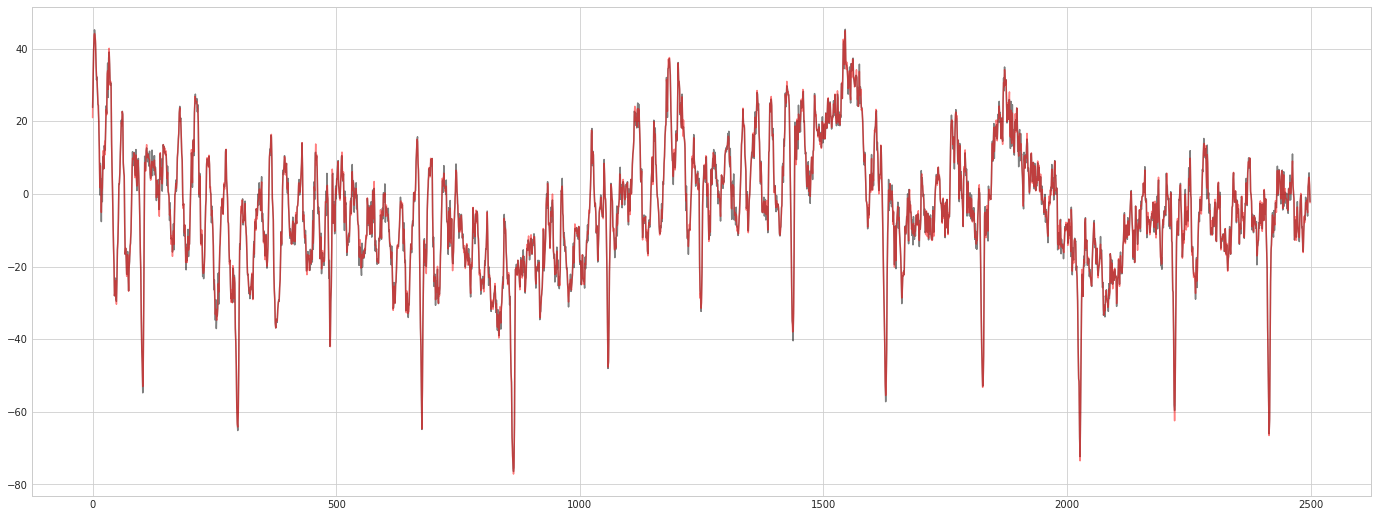

In [41]:
ch = 18
s1, s2 = 0,2500 # ten seconds
plt.plot(edf_orig[ch,0:2500],color='black', alpha=0.5)
plt.plot(edf_downupt[0:2500,ch], color='red', alpha=0.5)

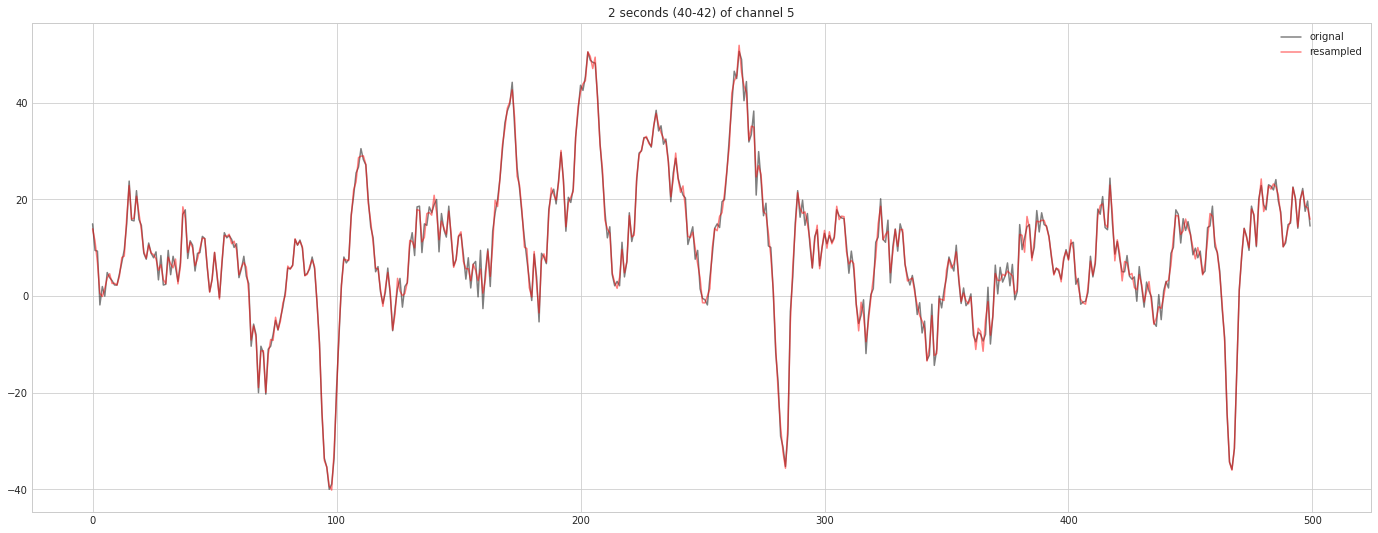

In [42]:
ch = 5
t1, t2 = 40,42
s1, s2 = t1*250, t2*250
plt.plot(edf_orig[ch,s1:s2],color='black', alpha=0.5, label='orignal')
plt.plot(edf_downupt[s1:s2,ch], color='red', alpha=0.5, label='resampled')
plt.title('%s seconds (%.0f-%.0f) of channel %s' % (t2-t1, t1,t2, ch))
plt.legend()

In [43]:
# now try big all at once resample
big = hf.phys_signals[:27, :]
big.shape


(27, 362200)

In [44]:
%time bigdown = sk_samplerate.resample(big.transpose(), 100/200, 'sinc_best')

CPU times: user 4.31 s, sys: 71.8 ms, total: 4.38 s
Wall time: 3.46 s


In [45]:
bigdown.shape

(181099, 27)

In [46]:
import resampy

In [47]:
res0 = 200
res1 = 150
%time resbigdown = resampy.resample(big, res0,res1, axis=1, filter='kaiser_best')

CPU times: user 1.51 s, sys: 31.8 ms, total: 1.55 s
Wall time: 1.54 s


In [48]:
resbigdownup = resampy.resample(resbigdown, res1,res0,axis=1, filter='kaiser_best')

In [49]:
print('big.shape:', big.shape)
print(resbigdown.shape)
print(resbigdownup.shape)

big.shape: (27, 362200)
(27, 271650)
(27, 362200)


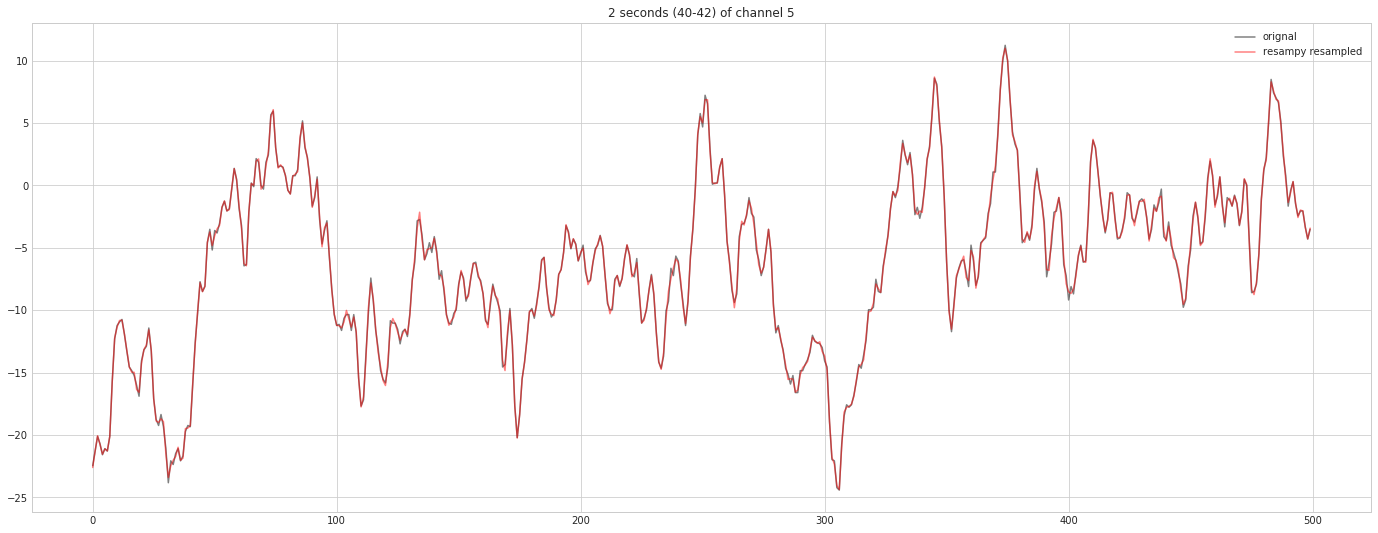

In [50]:
ch = 5
t1, t2 = 40,42
s1, s2 = t1*250, t2*250
plt.plot(big[ch,s1:s2],color='black', alpha=0.5, label='orignal')
plt.plot(resbigdownup[ch,s1:s2], color='red', alpha=0.5, label='resampy resampled')
plt.title('%s seconds (%.0f-%.0f) of channel %s' % (t2-t1, t1,t2, ch))
plt.legend()
plt.show()

In [51]:
# note with resampy I am using floating point arrays as input and I am setting the axis=1 argument with this shape of input arrays